In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_undac = pd.read_csv('data_undac_salud_mental.csv')
data_undac.head()

,Unnamed: 0,Genero,Edad,Carrera,Años estudiando,Promedio,Casadx,Depresion,Ansiedad,Panico,Tratamiento
0,0,femenino,18.0,ingenieria ambiental,1 año,14 o más,no,no,no,si,no
1,1,masculino,21.0,educacion secundaria,2 años,14 o más,no,si,si,no,no
2,2,masculino,19.0,medicina,1 año,14 o más,no,si,si,si,no
3,3,femenino,22.0,ingenieria civil,3 años,14 o más,si,no,no,no,no
4,4,masculino,23.0,economia,4 años,14 o más,no,no,no,no,no


In [19]:
data_undac = data_undac.drop(["Unnamed: 0"],axis = 1)

In [20]:
data_undac.head()

,Genero,Edad,Carrera,Años estudiando,Promedio,Casadx,Depresion,Ansiedad,Panico,Tratamiento
0,femenino,18.0,ingenieria ambiental,1 año,14 o más,no,no,no,si,no
1,masculino,21.0,educacion secundaria,2 años,14 o más,no,si,si,no,no
2,masculino,19.0,medicina,1 año,14 o más,no,si,si,si,no
3,femenino,22.0,ingenieria civil,3 años,14 o más,si,no,no,no,no
4,masculino,23.0,economia,4 años,14 o más,no,no,no,no,no


In [21]:
#numero de columnas
len(data_undac.index)

101

In [22]:
#datos nulos o datos "perdidos"
data_undac.isnull().sum()

Genero             0
Edad               1
Carrera            0
Años estudiando    0
Promedio           0
Casadx             0
Depresion          0
Ansiedad           0
Panico             0
Tratamiento        0
dtype: int64

In [23]:
#existe un dato nulo en la columna edad así que lo reemplazaremos por la media
mean_value = data_undac['Edad'].mean()
data_undac['Edad'] = data_undac['Edad'].fillna(value = mean_value)

In [24]:
#En el apartado de casadx es muy especifico así que lo reemplezaremos por si tiene pareja 
dict = {'Casadx': 'Con pareja'
       }
    
data_undac.rename(columns = dict, inplace = True)
data_undac.head()

,Genero,Edad,Carrera,Años estudiando,Promedio,Con pareja,Depresion,Ansiedad,Panico,Tratamiento
0,femenino,18.0,ingenieria ambiental,1 año,14 o más,no,no,no,si,no
1,masculino,21.0,educacion secundaria,2 años,14 o más,no,si,si,no,no
2,masculino,19.0,medicina,1 año,14 o más,no,si,si,si,no
3,femenino,22.0,ingenieria civil,3 años,14 o más,si,no,no,no,no
4,masculino,23.0,economia,4 años,14 o más,no,no,no,no,no


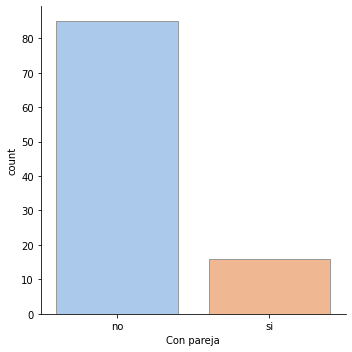

In [27]:
sns.catplot(x = 'Con pareja',
           kind = 'count',
           palette = 'pastel',
           edgecolor= '.6',
           data = data_undac)
data_undac = data_undac.drop('Con pareja',axis = 1 )

In [28]:
#contaremos la cantidad de estudiantes encuestadas en algunas carreras
data_undac['Carrera'].value_counts()

ingenieria de sistemas    18
ingenieria ambiental      17
medicina                  10
odontologia                7
zootecnia                  7
enfermeria                 6
derecho                    6
economia                   5
ingenieria de minas        4
ingenieria metalurgica     3
administracion             3
agronomia                  3
educacion primaria         3
contabilidad               3
ingenieria civil           2
educacion secundaria       2
educacion inicial          2
Name: Carrera, dtype: int64

In [29]:
#contaremos cuantas personas llevan tratamiento
data_undac['Tratamiento']. value_counts ()
#podemos ver que aprox el 6% de estudiantes llevan tratamiento no tomaremos este dato como consideracion porque ya es muy explicito

no    95
si     6
Name: Tratamiento, dtype: int64

0      (17.999, 19.0]
1        (19.0, 24.0]
2      (17.999, 19.0]
3        (19.0, 24.0]
4        (19.0, 24.0]
            ...      
96       (19.0, 24.0]
97     (17.999, 19.0]
98     (17.999, 19.0]
99       (19.0, 24.0]
100      (19.0, 24.0]
Name: Edad, Length: 101, dtype: category
Categories (2, interval[float64, right]): [(17.999, 19.0] < (19.0, 24.0]]

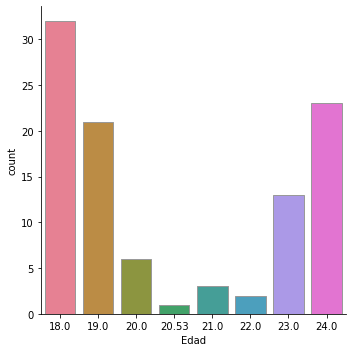

In [32]:
#al momento de encuestar las edades estaban en variable flotante así que está desbalanceado por lo tanto haremos 2 grupos iguales para igualar la data

sns.catplot (x = 'Edad',
            kind = 'count',
            palette = 'husl',
            edgecolor = '.6',
            data = data_undac)
pd.qcut(data_undac['Edad'], q=2)

### Gráficaremos cual es la mayor cantidad de años en las que los estudiantes están en la universidad 

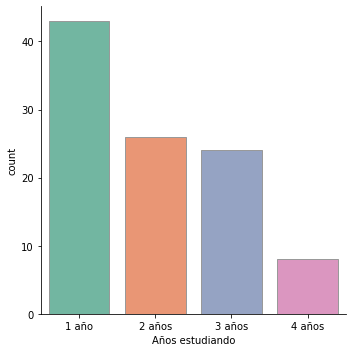

In [34]:
sns.catplot(x = 'Años estudiando',
           kind = 'count',
           palette = 'Set2',
           edgecolor = '.6',
           data = data_undac)

In [38]:
#para un mejor análisis agregaremos una columna más en la cual se sume cuantas enfermedades mentales tiene cada estudiante en caso las tenga
def cualquier_problema_mental (row):
    puntos = 0
    if row['Depresion'] == 'si':
        puntos +=1
    if row['Ansiedad'] == 'si':
        puntos +=1
    if row['Panico'] == 'si':
        puntos +=1
    return puntos

In [40]:
data_undac ['Problemas con la salud mental'] = data_undac.apply(lambda row: cualquier_problema_mental(row), axis = 1)

In [41]:
#Una vez hecha la correción de datos ahora exploraremos estos
data_undac.head()

,Genero,Edad,Carrera,Años estudiando,Promedio,Depresion,Ansiedad,Panico,Tratamiento,Problemas con la salud mental
0,femenino,18.0,ingenieria ambiental,1 año,14 o más,no,no,si,no,1
1,masculino,21.0,educacion secundaria,2 años,14 o más,si,si,no,no,2
2,masculino,19.0,medicina,1 año,14 o más,si,si,si,no,3
3,femenino,22.0,ingenieria civil,3 años,14 o más,no,no,no,no,0
4,masculino,23.0,economia,4 años,14 o más,no,no,no,no,0


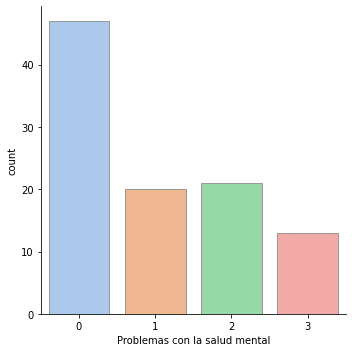

In [42]:
sns.catplot(x='Problemas con la salud mental',
           kind = 'count',
           palette ='pastel',
           edgecolor = '.6',
           data = data_undac)
#Podemos ver que más de un tercio de los estudientes no tienen ningun problema con la salud mental mientras que poco
#menos de un tercio alrededor de un 24% tienen entre 2 o 3 problemas se podría conseguir la diferencie de entre 1% y 3% si separamos mujeres y hombres



In [44]:
pd.crosstab (data_undac['Genero'],
            data_undac['Problemas con la salud mental'],
            normalize = 'index',
            margins = True)
#vemos lo dicho que ligeramente en ciertos casos los hombres como las mujeres se superan en cantidad 

Problemas con la salud mental,0,1,2,3
Genero,,,,
femenino,0.480000,0.200000,0.186667,0.133333
masculino,0.423077,0.192308,0.269231,0.115385
All,0.465347,0.198020,0.207921,0.128713


In [56]:
data_undac ['Promedio'].value_counts()
#vemos si el promedio afecta  primero lo contamos 

13            48
14 o más      43
11             4
10 o menos     4
12             2
Name: Promedio, dtype: int64

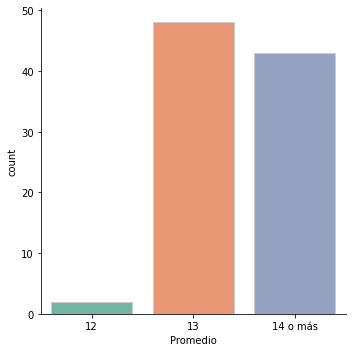

In [59]:
sns.catplot(x='Promedio',
           kind='count',
           palette= 'Set2',
           edgecolor ='.8',
           order = ['12','13','14 o más'],
           data = data_undac)
#vemos que hay una gran cantidad de alumnos que se encuentran entre los más sanos y los que tienen más problemas con las notas más altas


In [61]:
pd.crosstab(data_undac['Promedio'],
           data_undac ['Problemas con la salud mental'],
           normalize = 'index',
           margins = True)

Problemas con la salud mental,0,1,2,3
Promedio,,,,
10 o menos,0.750000,0.250000,0.000000,0.000000
11,0.250000,0.500000,0.000000,0.250000
12,0.500000,0.500000,0.000000,0.000000
13,0.395833,0.229167,0.208333,0.166667
14 o más,0.534884,0.116279,0.255814,0.093023
All,0.465347,0.198020,0.207921,0.128713


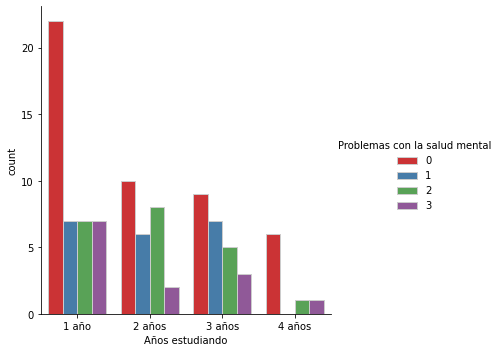

In [63]:
sns.catplot(x = 'Años estudiando',
           hue = 'Problemas con la salud mental',
           kind = 'count',
           palette = 'Set1',
           edgecolor = '.8',
           data = data_undac)
#mientras que no encotrabamos relación entre los problemas de salud mental con el promedio podemos ver que si hay problemas mientras más tiempo estás en la universidad
#asi que haremos para cada enfermedad mental cuestionada 

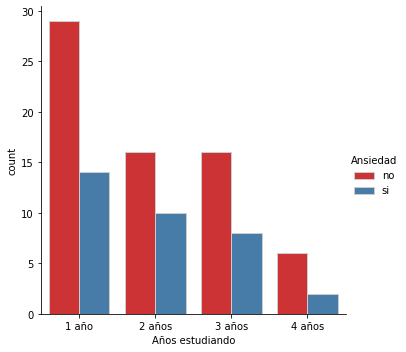

In [64]:
sns.catplot(x = 'Años estudiando',
           hue = 'Ansiedad',
           kind = 'count',
           palette = 'Set1',
           edgecolor = '.8',
           data = data_undac)

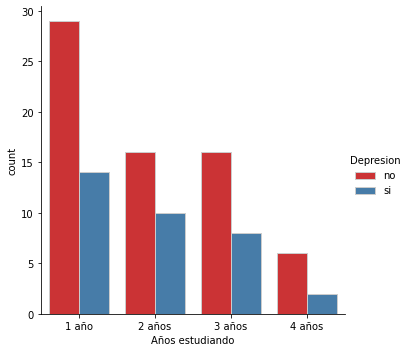

In [65]:
sns.catplot(x = 'Años estudiando',
           hue = 'Depresion',
           kind = 'count',
           palette = 'Set1',
           edgecolor = '.8',
           data = data_undac)

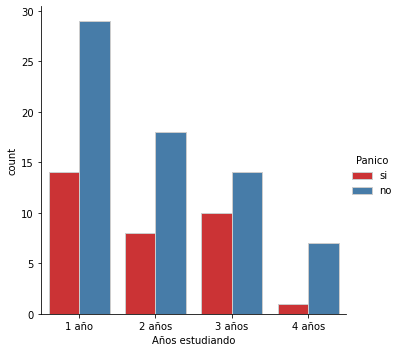

In [67]:
sns.catplot(x = 'Años estudiando',
           hue = 'Panico',
           kind = 'count',
           palette = 'Set1',
           edgecolor = '.8',
           data = data_undac)